<center> <h1> Attempt Overview </h1></center>

Explination: 
Tried to do it the way in the FTE but had no luck when trying to parse the data as needed. When doing this for the first answer for question 1 I could not seem to get the responses to properly generate. I did this for other questions and other files as well and had no luck. After multiple attempts and days worth of trying I decided to send this as is for hope of some points. I apologize for not sending an email or reaching out. I was out of town at a conference for work all week and only had time to work on this at night after conference and when it ended. I am really interested to see how it is done. Can you please post the answer to the assignment for me to go over? 

Idea:
My idea for this project was to parse out each answer portion of the the survey. After that I planned on using a similar method in the FTE to identfy the difference. Once these two pieces were created I planned on creating a function for each question to go through each of the images and append the correct question responses in order using a loop to store the answers. The loop would look and see if the code was looking at either the first part of the survey or second using i starting from 0 to 99. It would then use the i to obtain the correct file (CustomerSurvey_Completed-i) and then use (i+1)%2 to see what part of the survey was being used. If the answer had multiple values I planned on combining them together to fit in one cell using | to seperate them and not affect the CSV. Once these functions and loops ran and appened into one list. I then planned to export to CSV using import csv and creating a header with the values Q1:Q12. I also tried doing it the way you provided in the Zoom meeting and that was even worse. I got numerous errors I could not seem to debug.

Thank you and I apologize for not providing similar quality work as I did the first two weeks.

In [23]:
#import PyPDF2 
from PyPDF2 import PdfFileReader, PdfFileWriter,PdfFileMerger

# create a file object for our PDF

pdfFileObj_blank = open('C:/Users/eltac/Desktop/assign3_data/CustomerSurvey_blank.pdf', 'rb') 

pdfFileObj_filled = open('C:/Users/eltac/Desktop/assign3_data/CustomerSurvey_Completed.pdf', 'rb') 


# create an object to access the PDF
pdfReader_blank = PdfFileReader(pdfFileObj_blank) 
pdfReader_filled = PdfFileReader(pdfFileObj_filled) 

In [25]:
print(pdfReader_blank.numPages) 
print(pdfReader_filled.numPages) 

2
100


In [26]:
# import stuff
from wand.image import Image as Img

# variables are so much eaiser to work with
infile = 'CustomerSurvey_blank.pdf'
outfile = 'CustomerSurvey_blank.jpg'

base_dir = 'C:/Users/eltac/Desktop/assign3_data/' 

blank_infile = base_dir + infile    
blank_outfile = base_dir + outfile 

# actually convert the PDF into a JPEG
with Img(filename = blank_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename = blank_outfile)

In [27]:
# variables are so much eaiser to work with
infile = 'CustomerSurvey_Completed.pdf'
outfile = 'CustomerSurvey_Completed.jpg'


filled_infile = base_dir + infile    
filled_outfile = base_dir + outfile 

# actually convert the PDF into a JPEG
with Img(filename = filled_infile, resolution=300) as img:
    img.compression_quality = 99
    img.save(filename = filled_outfile)

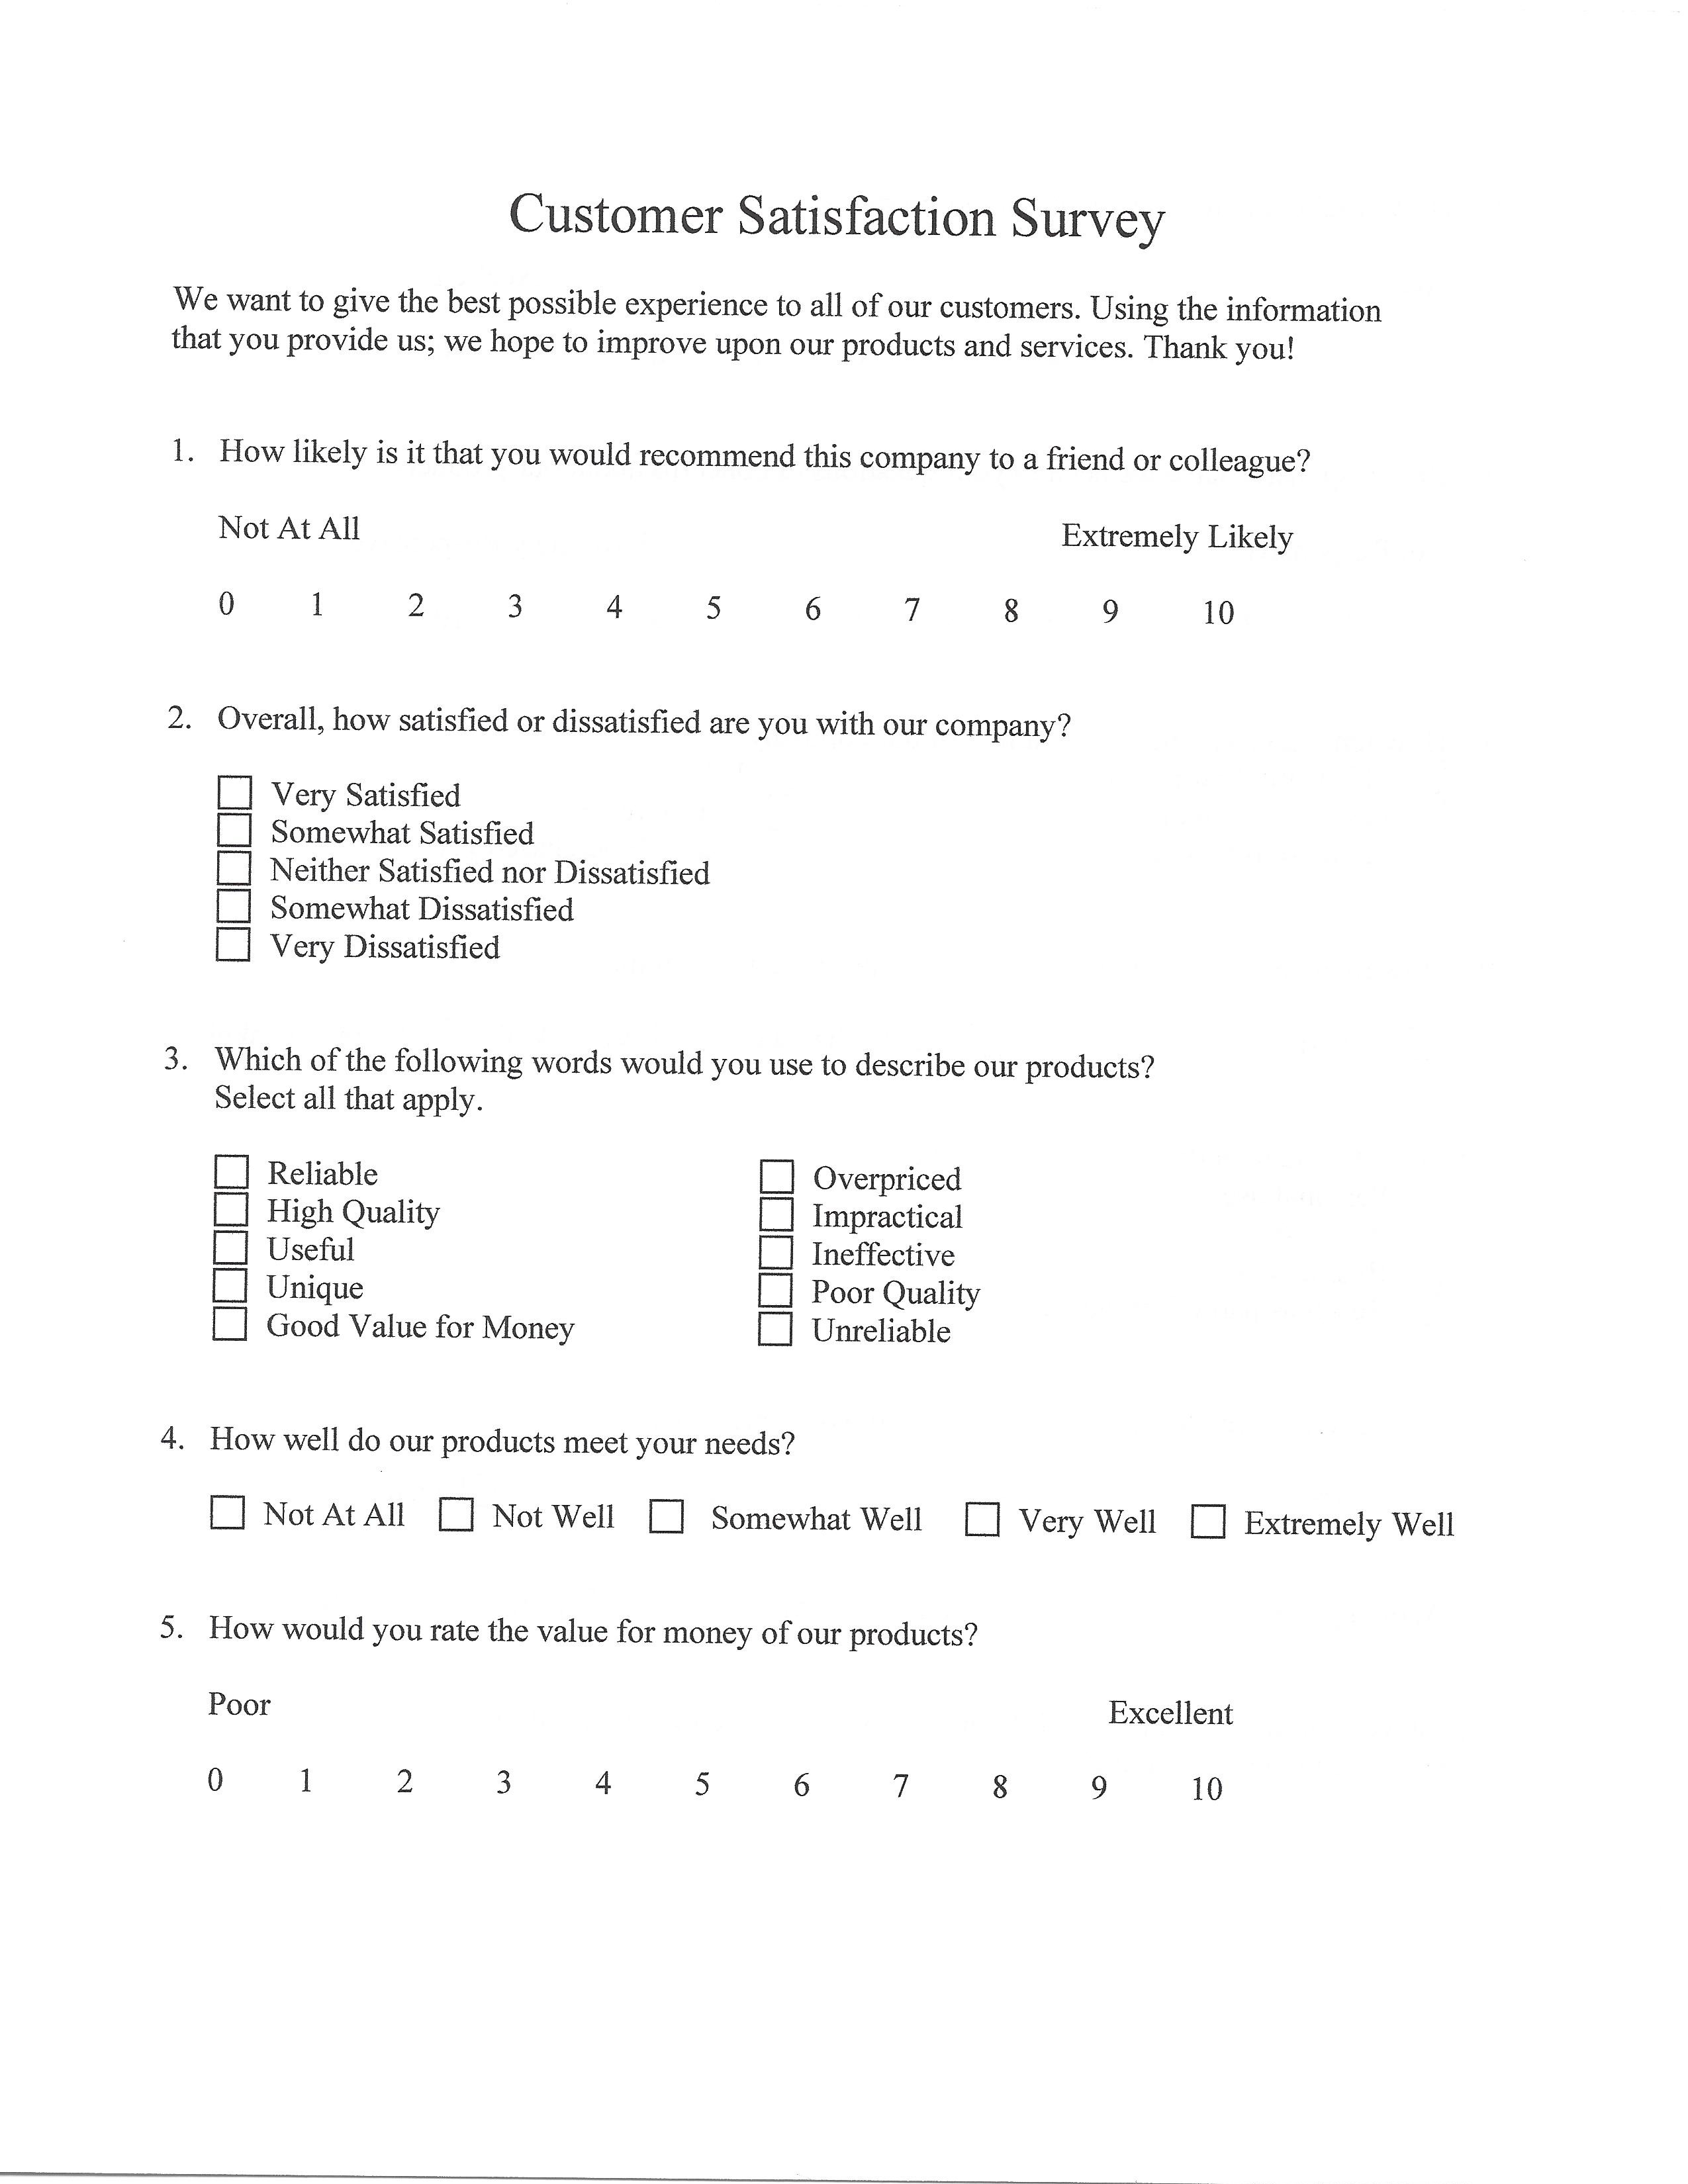

In [29]:
# look at the file with the 0 postfix first
from IPython.display import Image

blank_image1 = base_dir + 'CustomerSurvey_blank-0.jpg'

Image(filename=blank_image1)

In [ ]:
# look at the file with the 0 postfix first
from IPython.display import Image

blank_image2 = base_dir + 'CustomerSurvey_blank-1.jpg'

Image(filename=blank_image2)

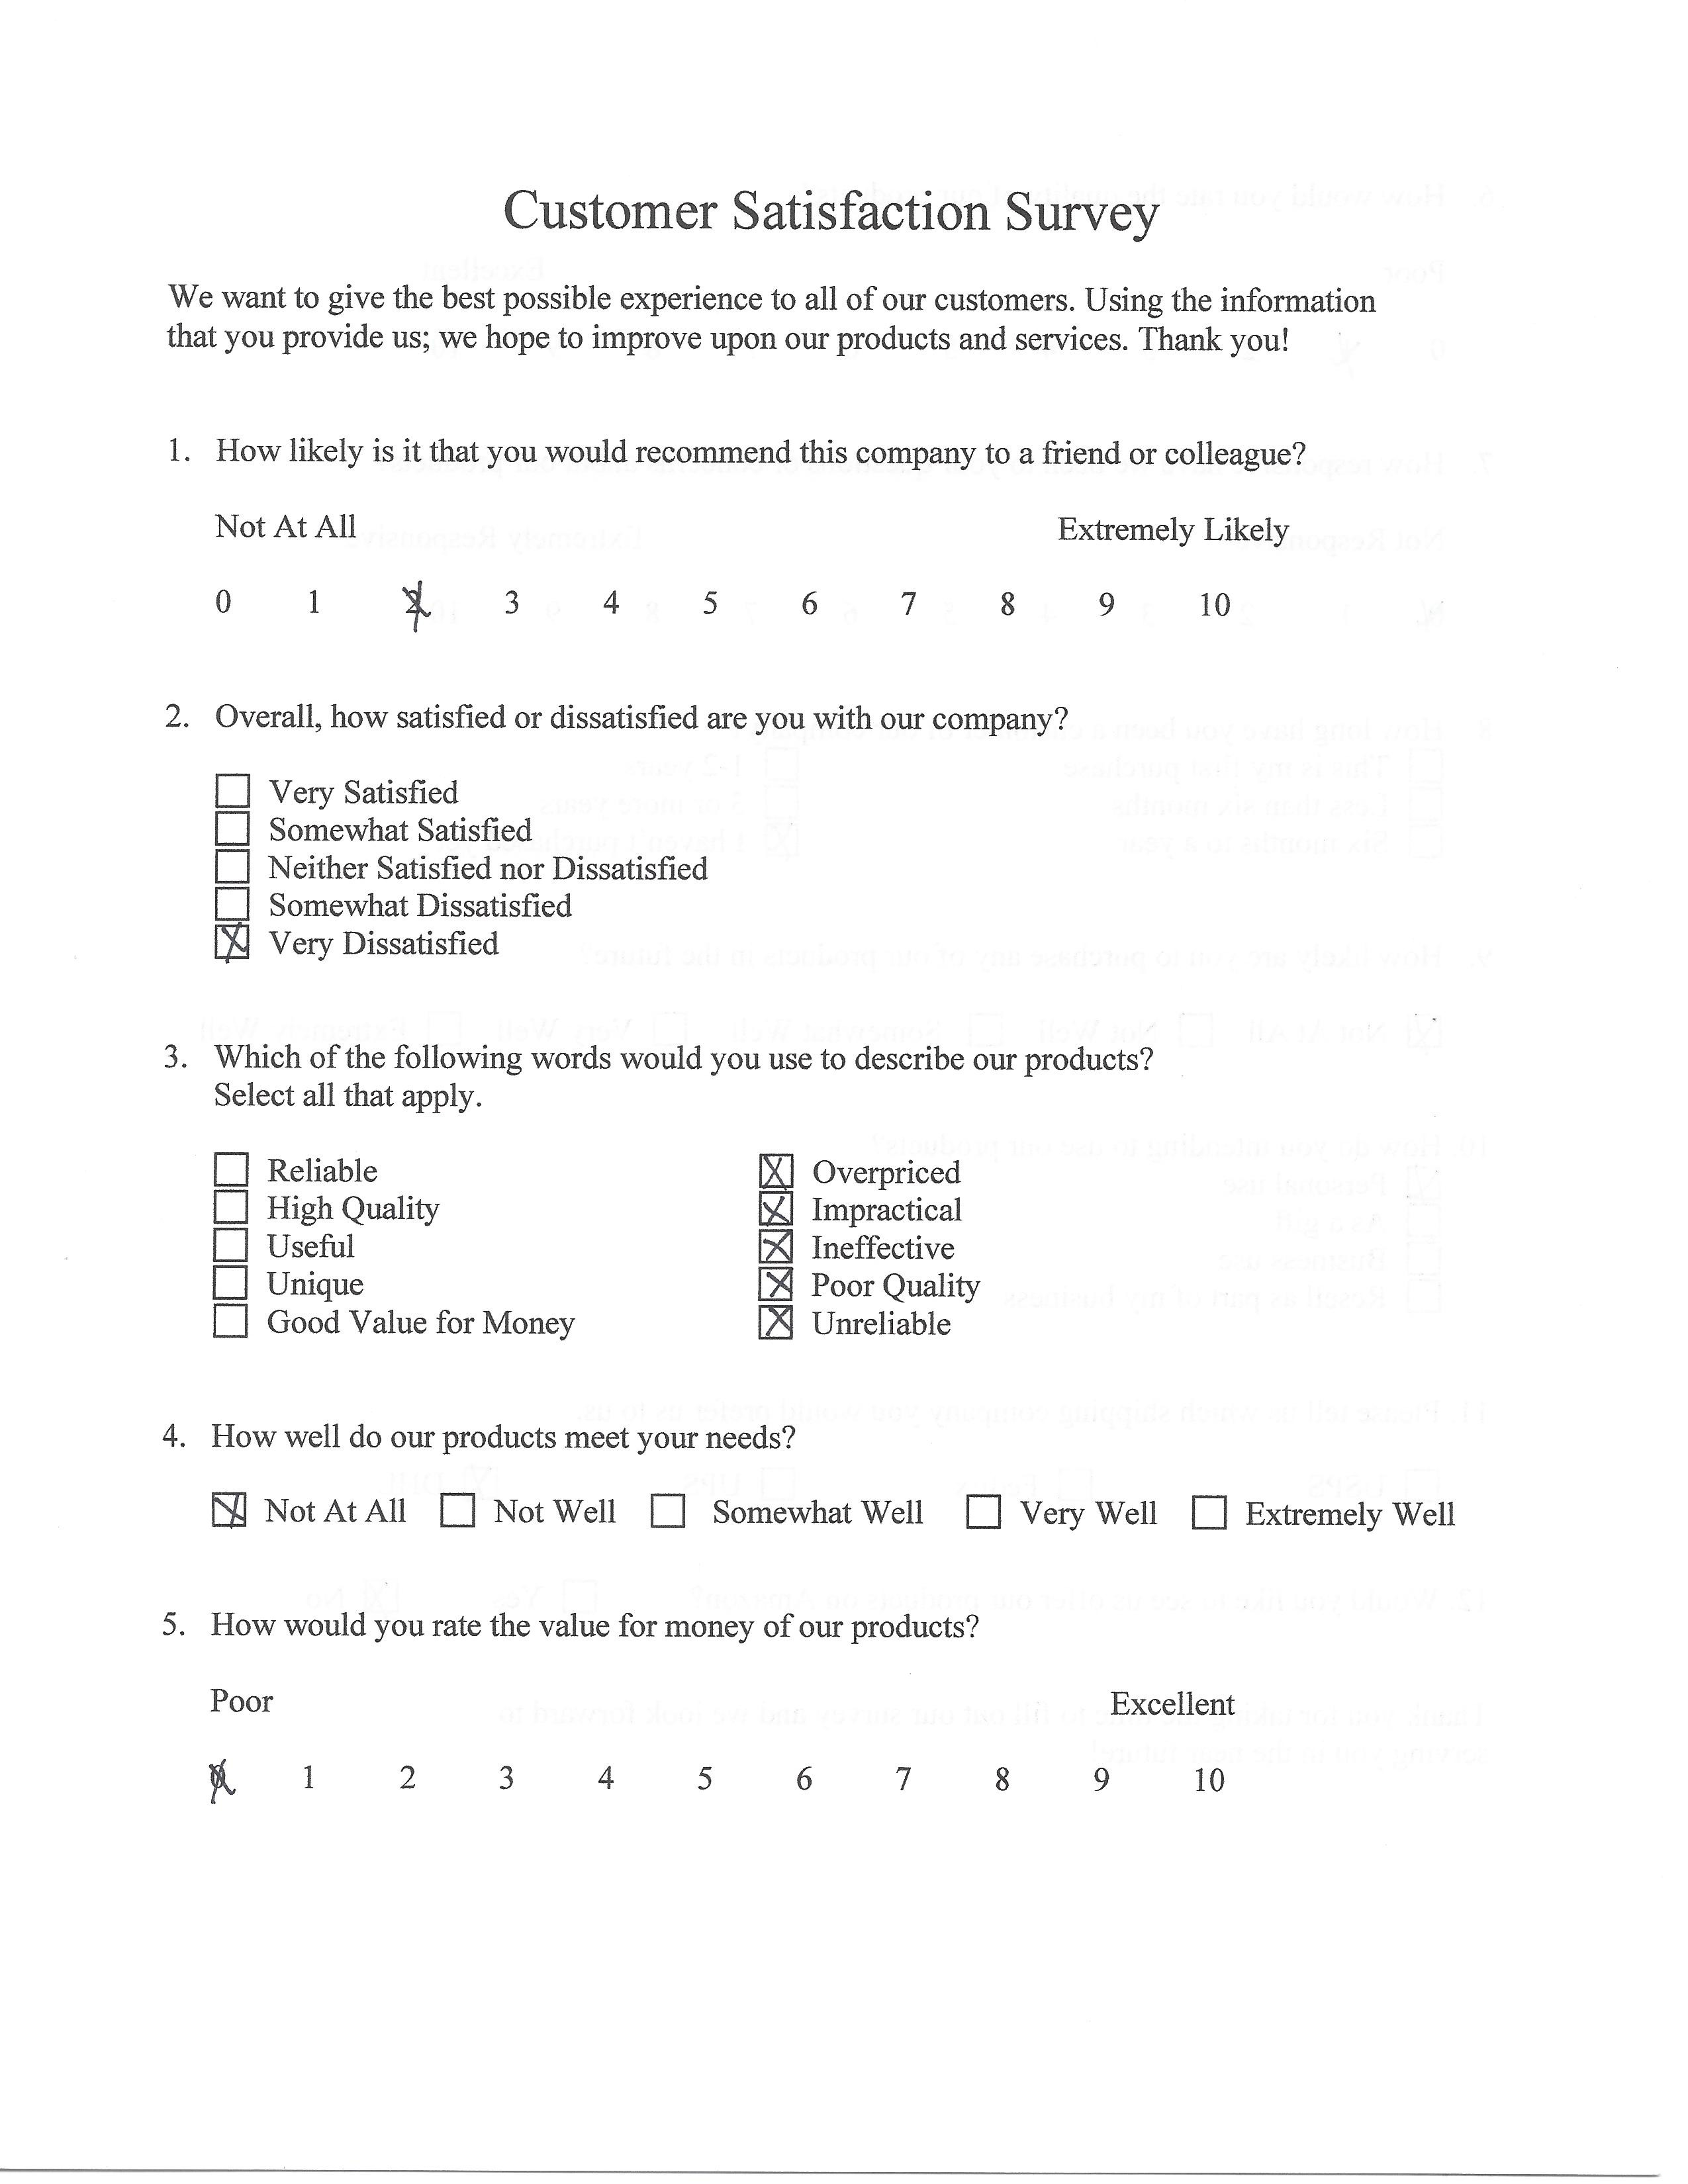

In [30]:
# look at the file with the 0 postfix first
from IPython.display import Image

filled_image1 = base_dir + 'CustomerSurvey_Completed-0.jpg'

Image(filename=filled_image1)

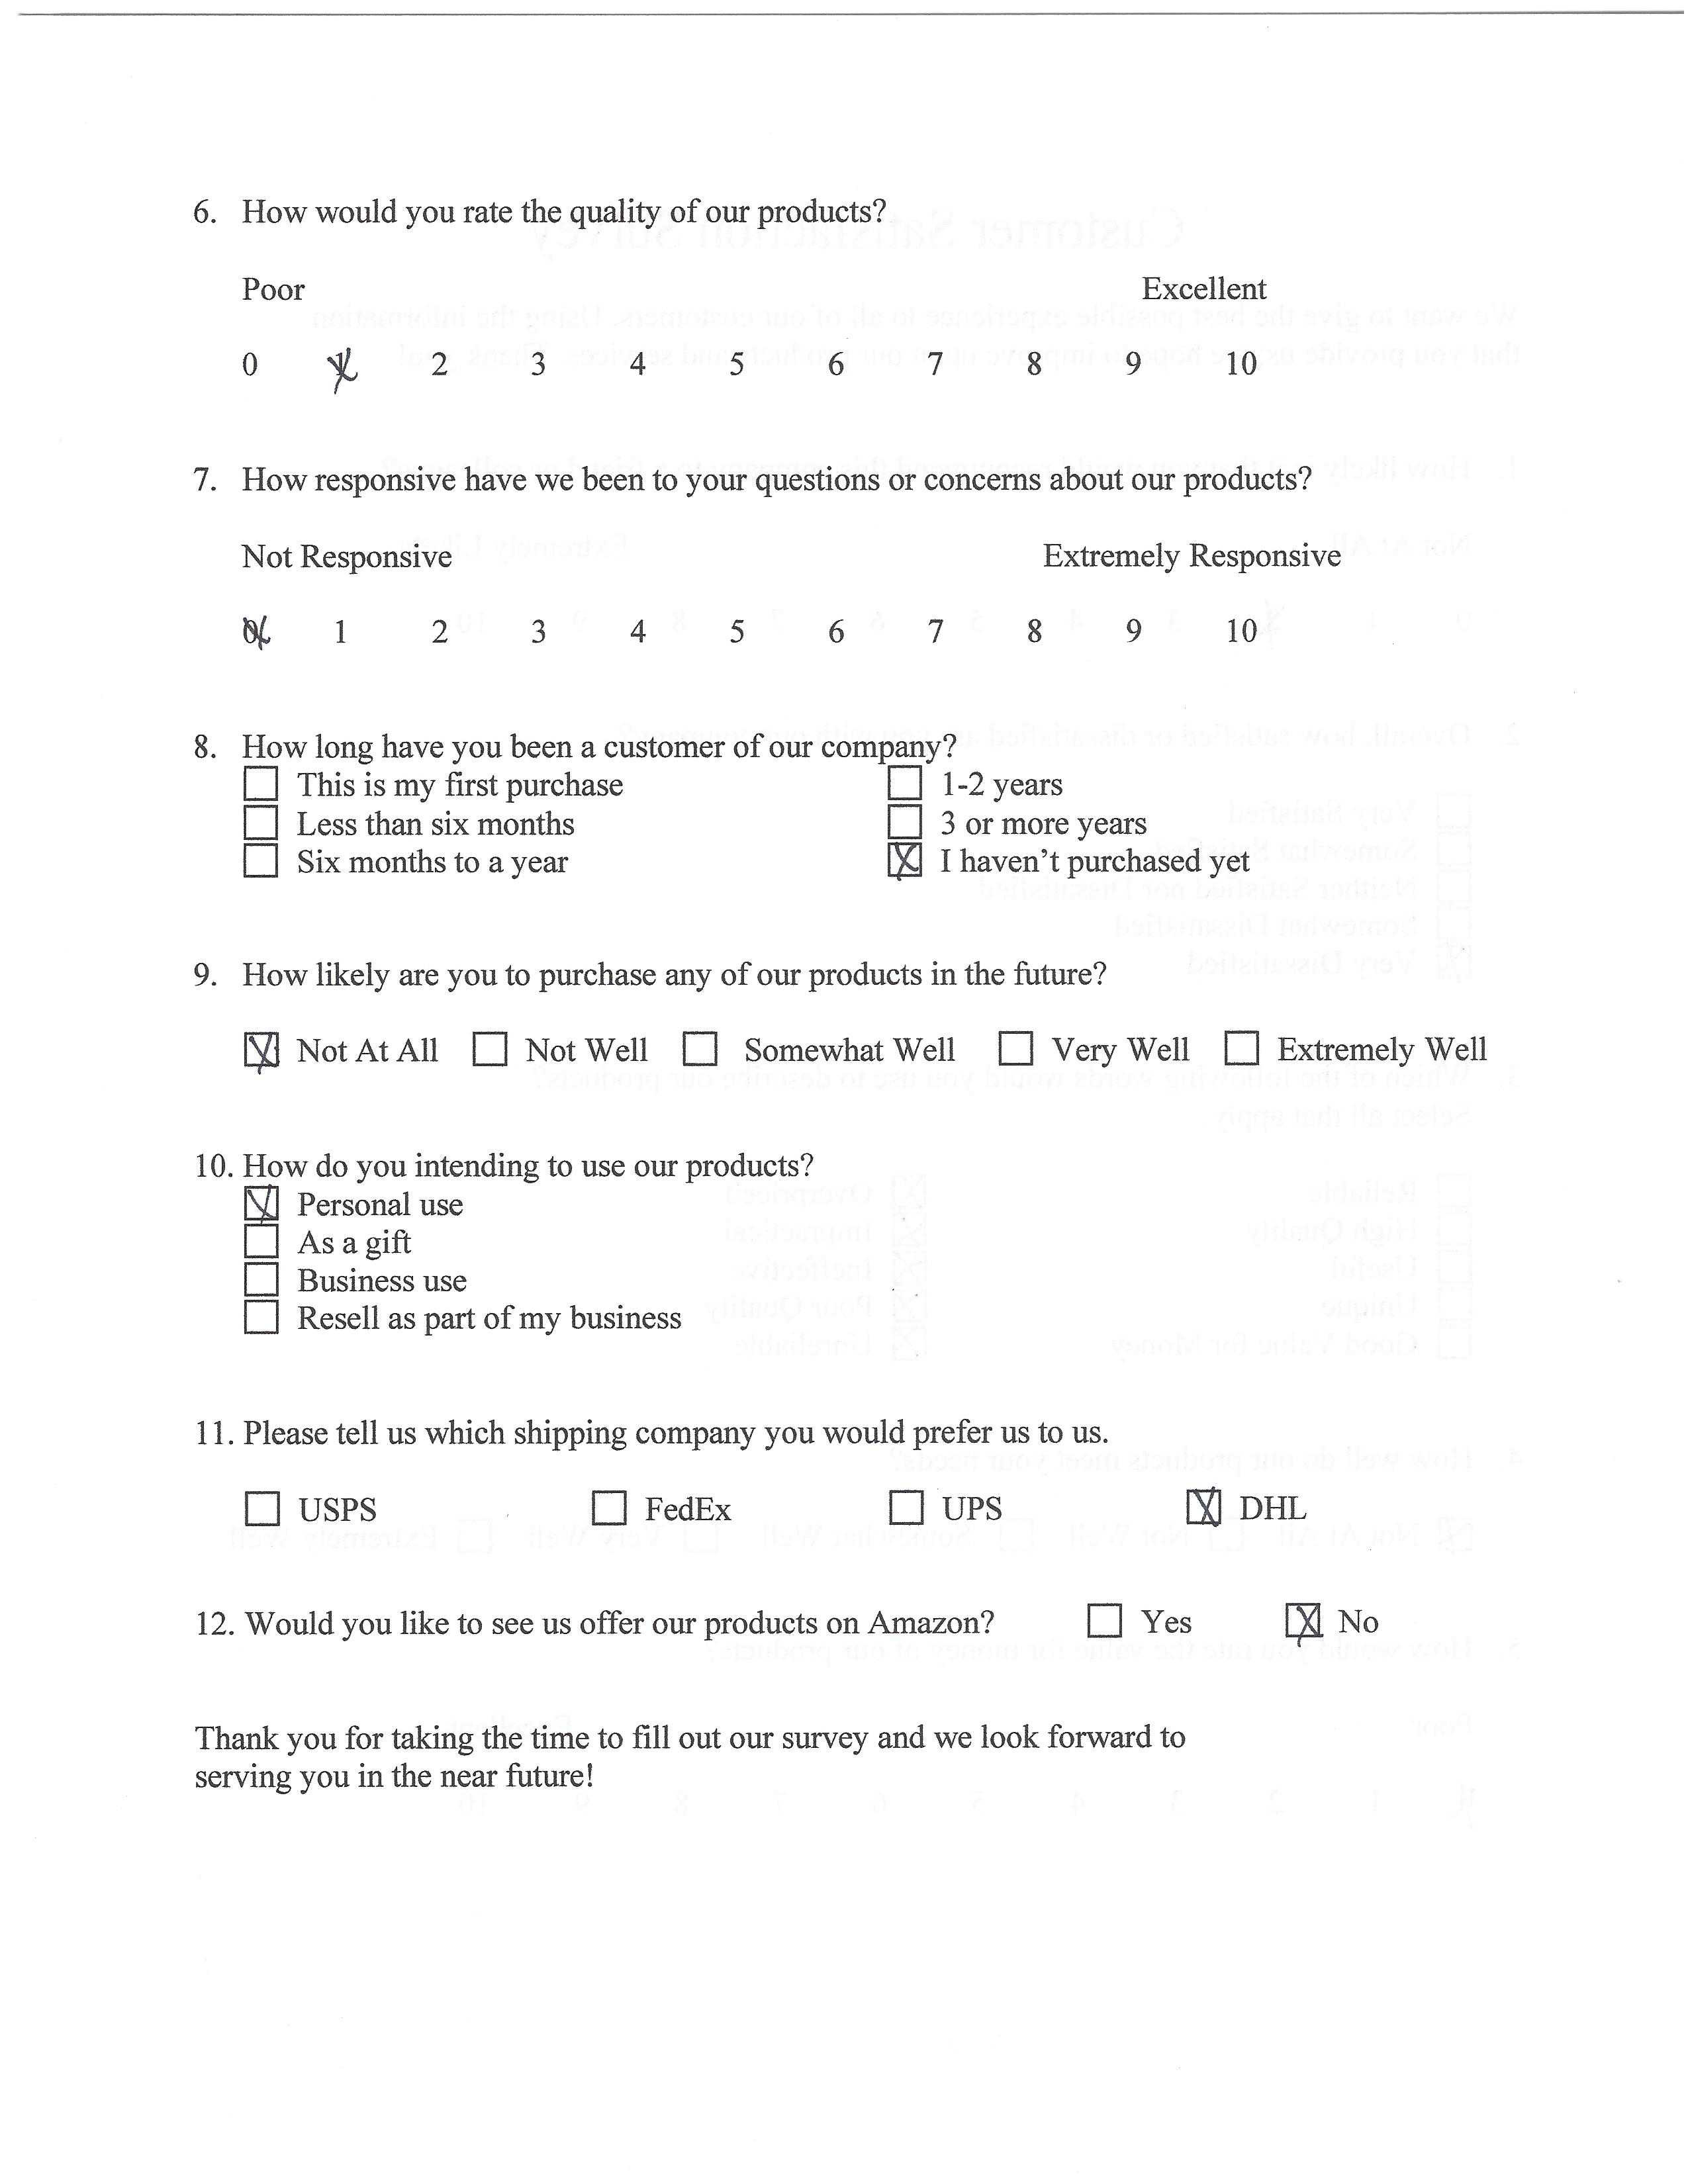

In [31]:
# and now for the second file
from IPython.display import Image

filled_image2 = base_dir + 'CustomerSurvey_Completed-1.jpg'

Image(filename=filled_image2)

In [32]:
# more imports
from PIL import Image
import pytesseract

# read and store the image
filled_text = pytesseract.image_to_string(Image.open(filled_image1))

# let's see what we have
filled_text

'Customer Satisfaction Survey\n\nWe want to give the best possible experience to all of our customers. Using the information\nthat you provide us; we hope to improve upon our products and services. Thank you!\n\n1. How likely is it that you would recommend this company to a friend or colleague?\n\nNot At All Extremely Likely\n\noO 1 4 3 4 5 6 7 8 9 10\n\n2. Overall, how satisfied or dissatisfied are you with our company?\n\n[_] Very Satisfied\n\n[_] Somewhat Satisfied\n\n[_] Neither Satisfied nor Dissatisfied\n= Somewhat Dissatisfied\nWh\n\nVery Dissatisfied\n3. ich of the following words would you use to describe our products?\n\nSelect all that apply.\n\n[_] Reliable [X] Overpriced\n\n[_] High Quality 4] Impractical\n\n[ ] Useful Ineffective\n\n[-] Unique Poor Quality\n\n[_] Good Value for Money [X] Unreliable\n\n4. How well do our products meet your needs?\n\nNJ Not At All [[] Not Well [] Somewhat Well [[] Very Well [[] Extremely Well\n\n5. How would you rate the value for money of 

In [42]:
q1_text = "How likely is it that you would recommend this company to a friend or colleague?\n\nNot At All Extremely Likely"
q1_answer = "n\noO 1 4 3 4 5 6 7 8 9 10\n\n2"  

In [43]:
# find the character position for the start of question 5
q1_begin_f = filled_text.find(q1_text)

# retreive the question 5 part of the string
#  substring format:: new_string = old_string[start:end]
q1_text_filled = filled_text[q1_begin_f:]
q1_text_filled

'How likely is it that you would recommend this company to a friend or colleague?\n\nNot At All Extremely Likely\n\noO 1 4 3 4 5 6 7 8 9 10\n\n2. Overall, how satisfied or dissatisfied are you with our company?\n\n[_] Very Satisfied\n\n[_] Somewhat Satisfied\n\n[_] Neither Satisfied nor Dissatisfied\n= Somewhat Dissatisfied\nWh\n\nVery Dissatisfied\n3. ich of the following words would you use to describe our products?\n\nSelect all that apply.\n\n[_] Reliable [X] Overpriced\n\n[_] High Quality 4] Impractical\n\n[ ] Useful Ineffective\n\n[-] Unique Poor Quality\n\n[_] Good Value for Money [X] Unreliable\n\n4. How well do our products meet your needs?\n\nNJ Not At All [[] Not Well [] Somewhat Well [[] Very Well [[] Extremely Well\n\n5. How would you rate the value for money of our products?\nPoor Excellent\n\nKX 1 2 3 4 5 6 7 8 9 10'

In [44]:
# find the character position for the start of Reponsiveness within question 5
q1_answer = q1_text_filled.find(q1_answer)

# retreive the responsiveness part of the string
q5_responsive_filled = q1_text_filled[q1_answer:]
q5_responsive_filled

'0'